# Разведочный анализ данных и визуализация

Отток - одна из самых больших проблем в телекоммуникационной отрасли. Исследования показали, что средний ежемесячный отток среди 4 ведущих операторов беспроводной связи в США составляет 1,9% - 2%.

[Разведочный анализ данных](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)

## Данные 

WA_Fn-UseC_-Telco-Customer-Churn.csv

### контекст
«Предсказать поведение, чтобы удержать клиентов. Вы можете анализировать все соответствующие данные клиентов и разрабатывать целевые программы удержания клиентов». [Примеры наборов данных IBM] Оригинал, как указано, принадлежит аналитическому сообществу IBM Watson.

### содержание
Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента, описанные в столбце Метаданные.

### Набор данных включает в себя информацию о:

Клиенты, которые вышли в течение последнего месяца - колонка называется Churn
Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, онлайн-резервное копирование, защита устройства, техническая поддержка, потоковое ТВ и фильмы
Информация об учетной записи клиента - как долго они были клиентом, контракт, способ оплаты, безбумажный биллинг, ежемесячные платежи и общие расходы
Демографическая информация о клиентах - пол, возраст, и есть ли у них партнеры и иждивенцы

### вдохновение

Чтобы изучить этот тип моделей и узнать больше о предмете.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

**Давайте прочитаем файл данных в блокноте Python по ссылке:**

 https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv



In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

Выведите заголовок данных, имена колонок:

In [0]:
df.head()

**Давайте исследуем данные, чтобы увидеть, есть ли пропущенные значения.**

 Выведите типы данных всех столбцов

In [0]:
df.info()

### Преобразование итоговых платежей _df.TotalCharges_ в числовой тип данных.

`pd.to_numeric`

In [0]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce', downcast='float')
df.info()

### Сколько значений null?

Для Total Charges есть 11 пропущенных значений. 

Удалить эти 11 строк из нашего набора данных

In [0]:
df.dropna(thresh=21, inplace=True)
df.info()

Создать df2, копию данных  без колонки id

 df.iloc

In [0]:
df2 = df.iloc[:, 1:]
df2.head()

преобразовать переменную предиктора df2['Churn'] в двоичную числовую переменную

In [0]:
df2['Churn'] = df2.Churn.map({'No':0, 'Yes':1})
df2.head()

преобразовать все категориальные переменные в фиктивные переменные pd.get_dummies

In [0]:
df2.info()

In [77]:
df_dummies = pd.get_dummies(df2, prefix='', prefix_sep='')
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female,Male,No,Yes,No,Yes,No,Yes,No,No phone service,Yes,DSL,Fiber optic,No,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,Month-to-month,One year,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,29.85,29.850000,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.500000,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.150002,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.750000,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.649994,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.500000,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.899902,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.450012,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.600006,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


 Получите корреляцию  corr() "оттока" df2['Churn'] с другими переменными:

 и нарисуйте столбчатую диаграмму через plot

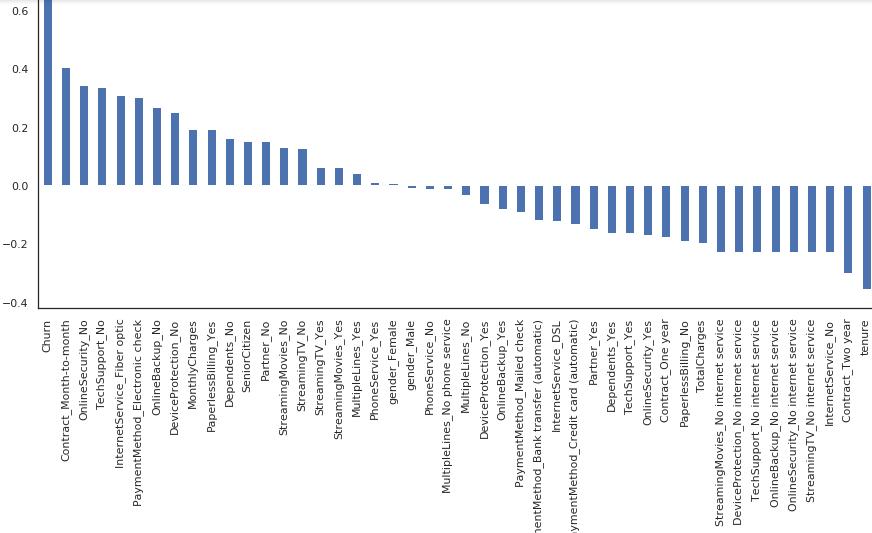

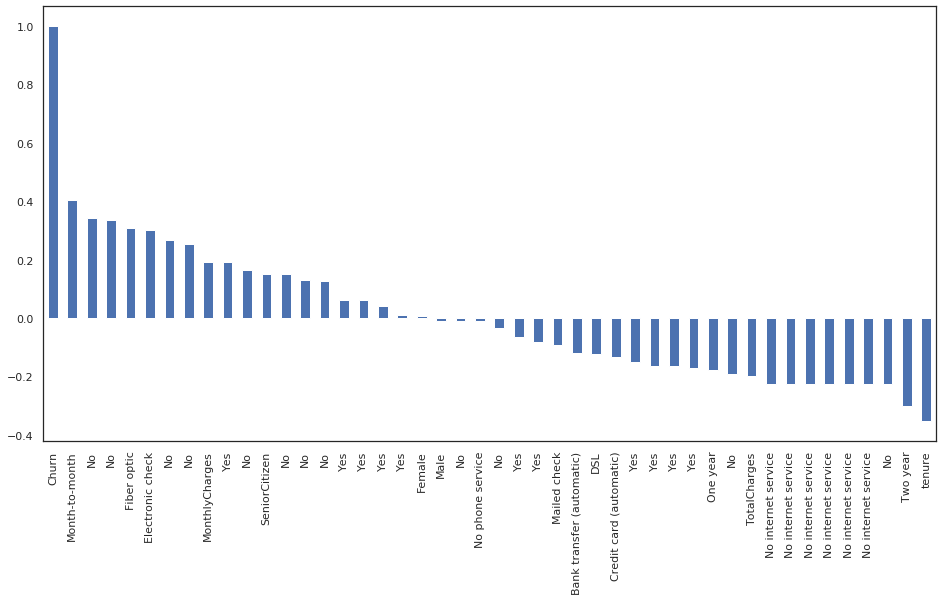

In [34]:
plt.figure(figsize=(16,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


Как коррелируют с оттоком месячные контракты, отсутствие онлайн-безопасности и технической поддержки? Как срок пребывания, двухлетние контракты коррелируют с оттоком?

Как коррелируют с оттоком отстутствие у клиента услуг, как онлайн-безопасность, потоковое телевидение, онлайн-резервирование, техническая поддержка, подключение к Интернету.

Ниже мы рассмотрим шаблоны для приведенных выше корреляций, прежде чем углубляться в моделирование и определение важных переменных.

## Исследование данных

Давайте сначала начнем с изучения нашего набора данных, чтобы лучше понять закономерности в данных и потенциально сформировать некоторую гипотезу. Сначала мы рассмотрим распределение отдельных переменных, а затем нарежем и нарежем наши данные для любых интересных тенденций.

Давайте сначала поймем пол, возрастной диапазон, марку и зависимый статус клиентов

1. **Отобразите Распределение по полу** - Около половины клиентов в нашем наборе данных - мужчины, а другая половина - женщины

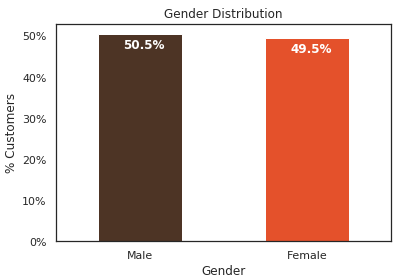

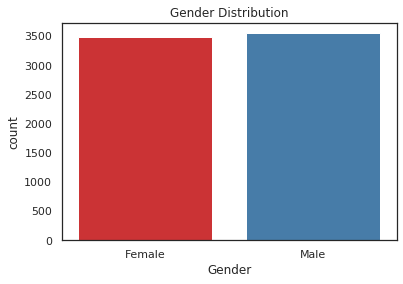

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df2, palette='Set1')

plt.title("Gender Distribution")
plt.xlabel("Gender")
#plt.ylabel("% Customers")
plt.show()

2. **%Отобразите долю 'SeniorCitizen' в виде пирога pie**

только 16% клиентов являются пожилыми людьми. Таким образом, большинство наших клиентов в данных молодые люди.



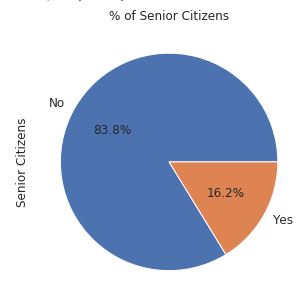

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


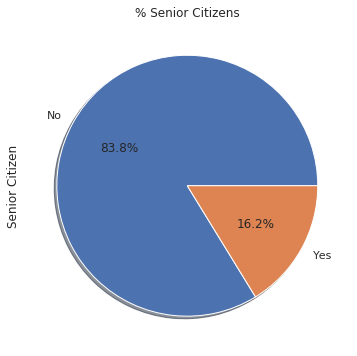

               SeniorCitizen
SeniorCitizen               
0                       5890
1                       1142


In [53]:
plt.figure(figsize=(8,6))
values = pd.DataFrame(df2.groupby('SeniorCitizen').SeniorCitizen.count())
labels = ['No', 'Yes']

plt.pie(values, labels=labels, autopct='%.1f%%', shadow=True)
plt.title('% Senior Citizens')
plt.ylabel('Senior Citizen')
plt.show()
print(values)

3. **Партнерский и зависимый статус** 'Dependents','Partner' - около 50% клиентов имеют партнера, в то время как только 30% от общего числа клиентов имеют иждивенцев.

Покажите на столбчатой (или по вашему выбору) диаграмме процент клиентов в отношениях, с иждивенцами.


задача * вывести в одном столбце 'Dependents' %% да и нет, разными цветами
*для накопления данных можно вспомнить pd.melt, groupby, count, unstack, loc, cumsum, sns.barplot или plot.bar(stacked=True, ..) 

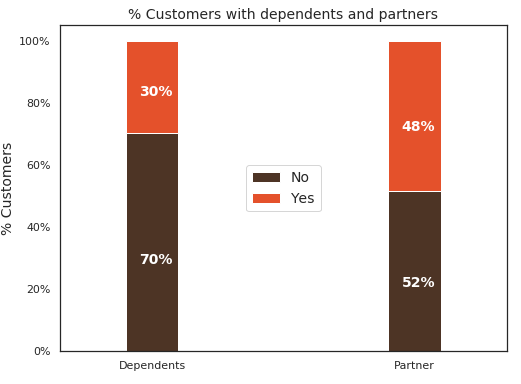



---



In [0]:
df2['Partner'] = df2.Partner.map({'No':0, 'Yes':1})
df2.dropna(thresh=4, inplace=True)
df2.info()

In [0]:
df2['Dependents'] = df2.Dependents.map({'No':0, 'Yes':1})
df2

In [0]:
values = pd.DataFrame(df2.groupby('Dependents').Dependents.count())

df2.pivot(values, ).plot(stacked=True, kind='bar')

** Интересно было бы посмотреть на% клиентов, у которых есть партнеры, также есть иждивенцы. Мы рассмотрим это дальше. **

Интересно, что среди клиентов, у которых есть партнер, только около половины из них также имеют иждивенцев, в то время как у другой половины нет независимых.
Кроме того, как и ожидалось, среди клиентов, у которых нет партнера, большинство (80%) из них не имеют иждивенцев.

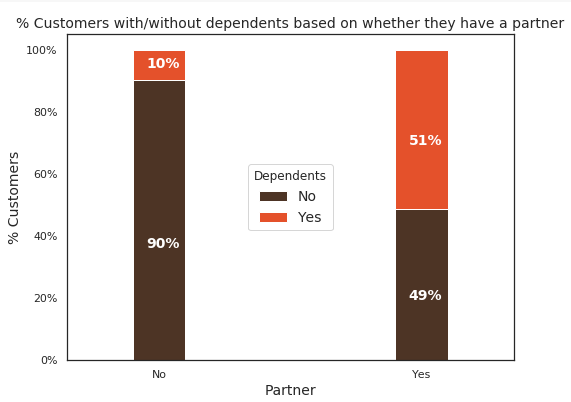

Я также посмотрел на любые различия между процентом клиентов с / без иждивенцев и партнеров по полу. Там нет разницы в их распределении по полу. Кроме того, нет различий в статусе пожилых людей по полу.

### B.) ** Информация об учетной записи клиента **: Теперь давайте посмотрим на срок владения, договор

**1. Срок владения:** _df['tenure']_ Изучив приведенную ниже гистограмму, мы видим, что многие клиенты работают в телекоммуникационной компании всего месяц, а многие - около 72 месяцев. Это может быть потенциально потому, что разные клиенты имеют разные контракты. Таким образом, на основании заключенного ими контракта клиентам может быть более / менее легче оставаться / покидать телекоммуникационную компанию.

In [83]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1


In [96]:
df2.tenure.max()

72

In [105]:
df2.tenure.min()

1

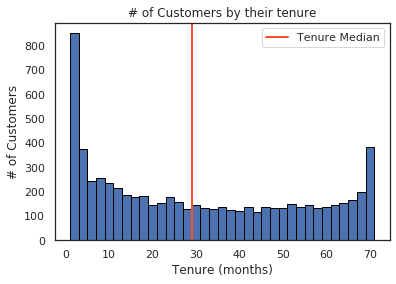

In [108]:
x = df2['tenure']
bins = range(1, 72, 2)

plt.hist(x, bins=bins, edgecolor='black')

median_tenure = x.median()
plt.axvline(median_tenure, color='#fc4f30', label='Tenure Median', linewidth=2)

plt.legend()

plt.title('# of Customers by their tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('# of Customers')

plt.show()

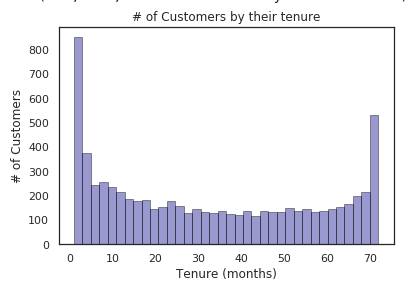

** 2. Контракты: ** Чтобы понять вышеприведенный график, давайте сначала посмотрим на количество клиентов по различным контрактам.

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


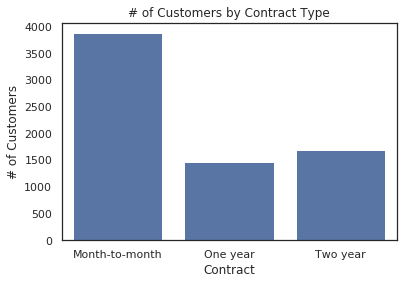

In [148]:
y = df2['Contract'].value_counts()
print(y)

sns.countplot(x='Contract', data=df2, color='b')

plt.title('# of Customers by Contract Type')
plt.ylabel('# of Customers')

plt.show()

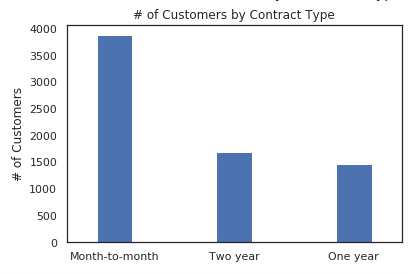

Как видно из этого графика, большинство клиентов заключают контракт на месяц. При этом количество контрактов в контрактах на 1 год и 2 года равно.

Ниже мы будем понимать срок пребывания _tenure_ клиентов на основе их типа контракта.

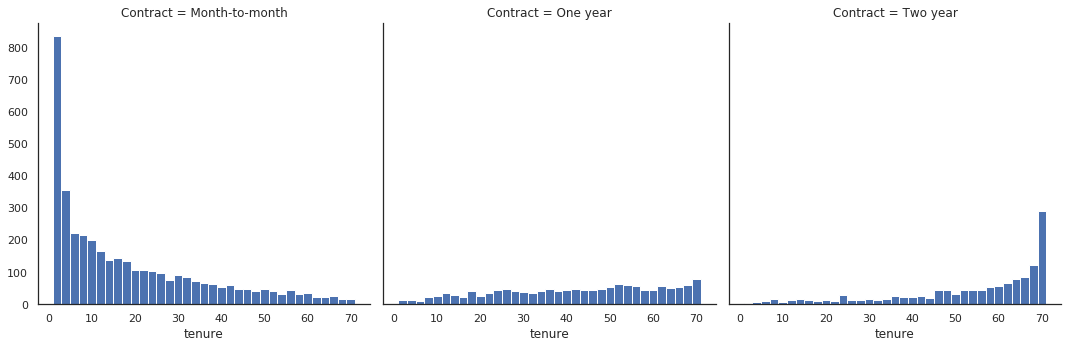

In [162]:
bins = range(1, 72, 2)
g = sns.FacetGrid(df2, col="Contract", height=5, aspect=1)
g = g.map(plt.hist, "tenure", bins=bins)

plt.show()

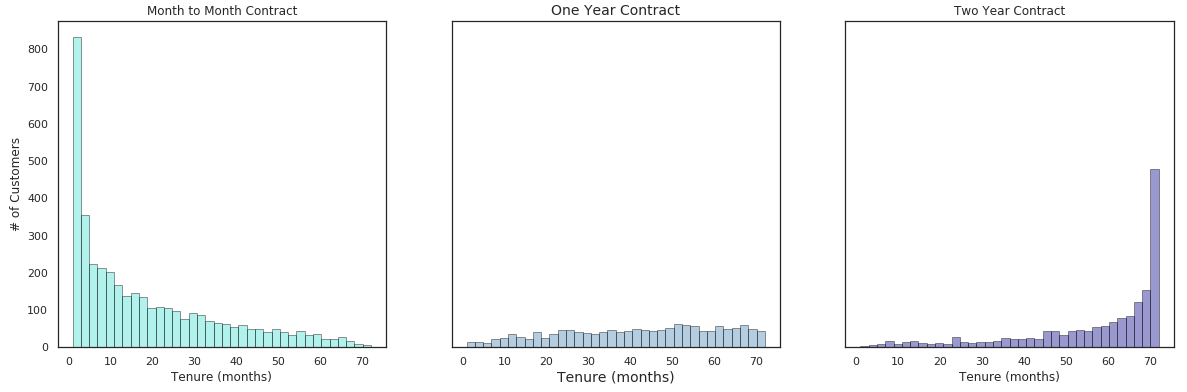

Интересно, что большинство ежемесячных контрактов длятся 1-2 месяца, в то время как двухлетние контракты обычно длятся около 70 месяцев. Это показывает, что клиенты, заключившие более длительный контракт, более лояльны к компании и, как правило, остаются с ней в течение более длительного периода времени.

Это также то, что мы видели на предыдущем графике корреляции с темпом оттока.

### C. Давайте теперь посмотрим на распределение различных услуг, используемых клиентами

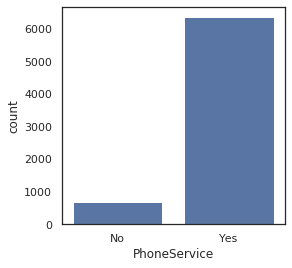

In [185]:
plt.figure(figsize=(4,4))
services = df2[['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]


sns.countplot(x='PhoneService', data=services, color='b')

plt.show()

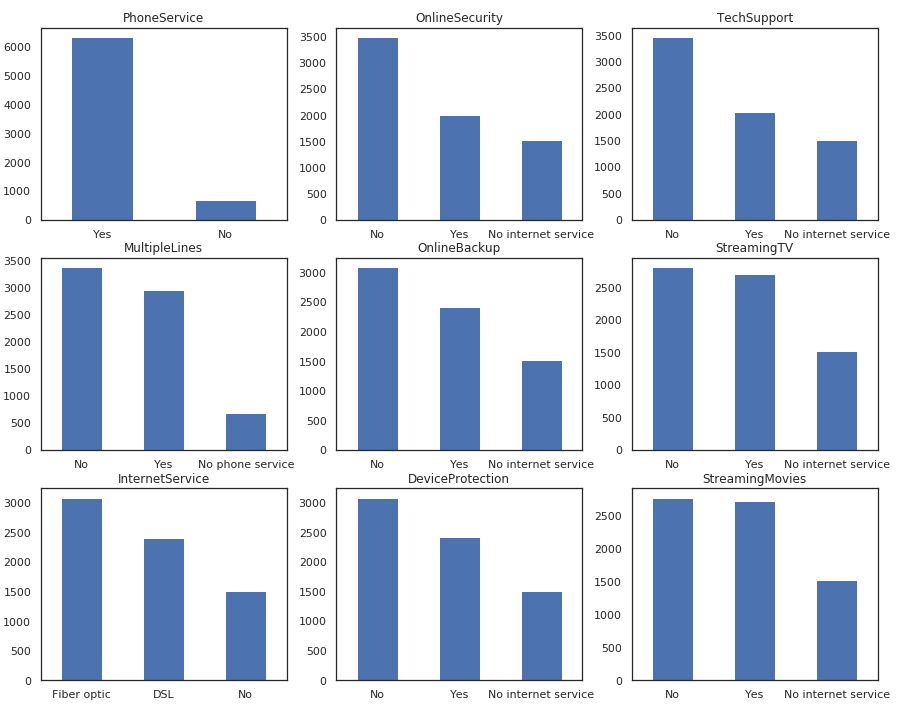

In [165]:

df2.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### D) Теперь давайте кратко рассмотрим соотношение между ежемесячными и общими расходами.

Мы заметим, что общая сумма платежей увеличивается с увеличением ежемесячного счета для клиента.

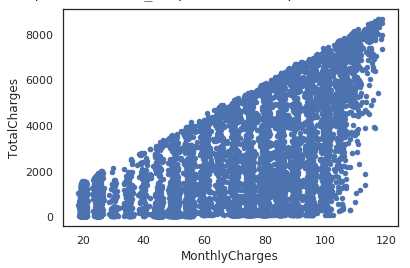

### E.) Наконец, давайте посмотрим на переменную предиктора (Churn) и поймем ее взаимодействие с другими важными переменными, как было обнаружено на графике корреляции.

1. Давайте сначала посмотрим на долю оттока в наших данных

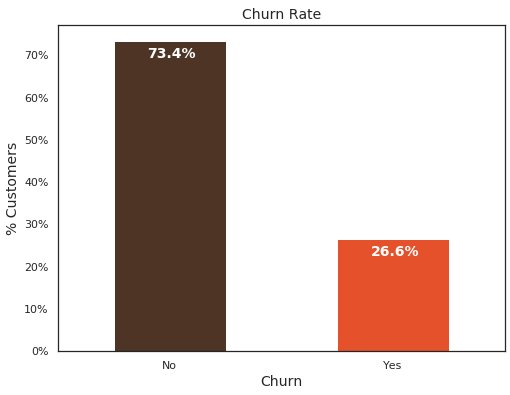

2. Теперь давайте рассмотрим коэффициент оттока в зависимости от срока пребывания, возраста, типа контракта, ежемесячных платежей и общих платежей, чтобы увидеть, как они варьируются в зависимости от этих переменных.

** i.) Отток против владения **: Как видно из приведенного ниже графика, клиенты, которые не производят отток, имеют тенденцию оставаться на более длительное время пребывания в телекоммуникационной компании.

Отобразите ящик с усами или скрипку, df.Churn, df.tenure

**ii.) Отток по типу контракта**: аналогично тому, что мы видели на графике корреляции, у клиентов, имеющих контракт на месяц, очень высокий процент оттока.

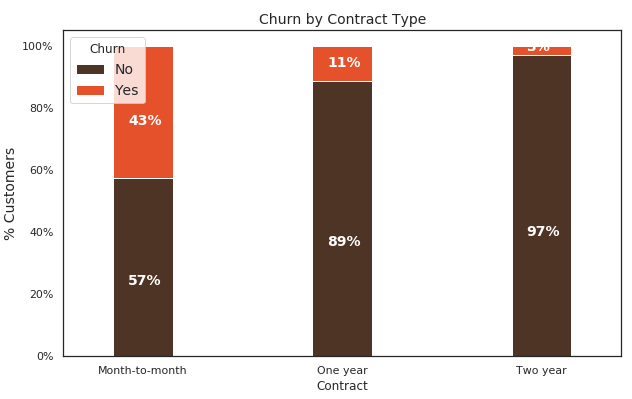

**iii.) Churn by Seniority**: Пожилые люди имеют почти вдвое больше оттока, чем более молодое население.

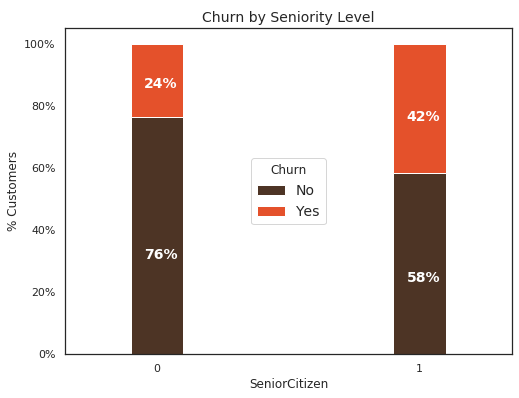

**iv.) Отток по ежемесячным платежам**: более высокий процент оттока клиентов при высокой ежемесячной оплате.

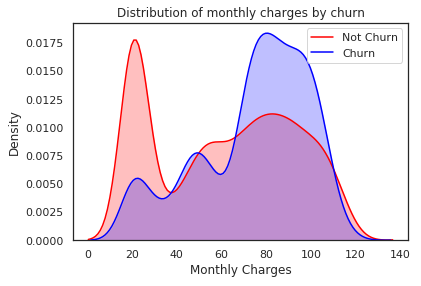

** v.) Отток по общим расходам **: кажется, что отток выше, когда общие расходы ниже.

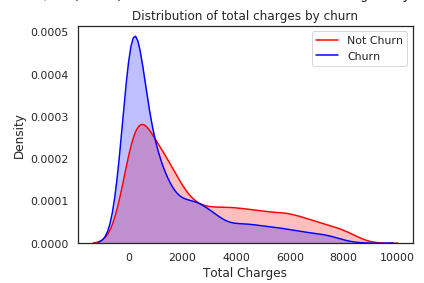